
# Librosa tutorial

- Version: 0.4.3
- Tutorial home: https://github.com/librosa/tutorial
- Librosa home: http://librosa.github.io/
- User forum: https://groups.google.com/forum/#!forum/librosa

## Environments

We assume that you have already installed [Anaconda](https://anaconda.org/).

If you don't have an environment, create one by following command:

```bash
conda create --name YOURNAME scipy jupyter ipython
```
(Replace `YOURNAME` by whatever you want to call the new environment.)

Then, activate the new environment
```bash
source activate YOURNAME
```


## Installing librosa
Librosa can then be installed by the following [🔗]:

```bash
conda install -c conda-forge librosa
```

*NOTE*: Windows need to install audio decoding libraries separately.  We recommend [ffmpeg](http://ffmpeg.org/).

## Test drive

Start Jupyter:
```bash
jupyter notebook
```
and open a new notebook.

Then, run the following:

In [1]:
import librosa
import librosa.display
print(librosa.__version__)
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

0.7.2


In [2]:
file_path = '/Users/hom/dev/Speech Interface/proj1_sample_32PCM.wav'
y, sr = librosa.load(file_path, 16000)
print(len(y), sr)

351542 16000


# Speech/Audio signal representation

Summarize various types of speech/audio file formats

Describe the header information of the ‘wav’ file format in detail
    

Positions	Sample Value	Description
1 - 4	"RIFF"	Marks the file as a riff file. Characters are each 1 byte long.
5 - 8	File size (integer)	Size of the overall file - 8 bytes, in bytes (32-bit integer). Typically, you'd fill this in after creation.
9 -12	"WAVE"	File Type Header. For our purposes, it always equals "WAVE".

13-16	"fmt "	Format chunk marker. Includes trailing null
17-20	16	Length of format data as listed above
21-22	1	Type of format (1 is PCM) - 2 byte integer
23-24	2	Number of Channels - 2 byte integer
25-28	44100	Sample Rate - 32 byte integer. Common values are 44100 (CD), 48000 (DAT). Sample Rate = Number of Samples per second, or Hertz.
29-32	176400	(Sample Rate * BitsPerSample * Channels) / 8.
33-34	4	(BitsPerSample * Channels) / 8.1 - 8 bit mono2 - 8 bit stereo/16 bit mono4 - 16 bit stereo
35-36	16	Bits per sample
37-40	"data"	"data" chunk header. Marks the beginning of the data section.
41-44	File size (data)	Size of the data section.
Sample values are given above for a 16-bit stereo source.

In [3]:
with open(file_path, 'rb') as f:
    chunk_id = f.read(4)
    print("1_Chunk id : {0}".format(chunk_id))
    chunk_size = f.read(4)
    print("1_Chunk size : {0}".format(int.from_bytes(chunk_size, byteorder='little')))
    audio_format = f.read(4)
    print("1_Audio_format : {0}".format(audio_format))
    
    chunk_id = f.read(4)
    print("2_Chunk id : {0}".format(chunk_id))
    chunk_size = f.read(4)
    print("2_Chunk size(fixed value) : {0}".format(int.from_bytes(chunk_size, byteorder='little')))
    audio_format = f.read(2)
    print("2_Audio format : {0}".format(audio_format))
    num_channels = f.read(2)
    print("2_Num channels : {0}".format(num_channels))
    sample_rate = f.read(4)
    sample_rate = int.from_bytes(sample_rate, byteorder='little')
    print("2_Sample rates : {0}".format(sample_rate))
    bytes_rate = f.read(4)
    print("2_Bytes rates : {0}".format(int.from_bytes(bytes_rate, byteorder='little')))
    block_align = f.read(2)
    print("2_Block align : {0}".format(int.from_bytes(block_align, byteorder='little')))
    bitpersample = f.read(2)
    bitpersample = int.from_bytes(bitpersample, byteorder='little')
    print("2_Bit per sample : {0}".format(bitpersample))
    
    chunk_id = f.read(4)
    print("3_Chunk id : {0}".format(chunk_id))
    chunk_size = f.read(4)
    print("3_Chunk size : {0}".format(int.from_bytes(chunk_size, byteorder='little')))
    

1_Chunk id : b'RIFF'
1_Chunk size : 4218568
1_Audio_format : b'WAVE'
2_Chunk id : b'fmt '
2_Chunk size(fixed value) : 16
2_Audio format : b'\x03\x00'
2_Num channels : b'\x01\x00'
2_Sample rates : 48000
2_Bytes rates : 192000
2_Block align : 4
2_Bit per sample : 32
3_Chunk id : b'fact'
3_Chunk size : 4


# Signal analysis (1)

step 1: Record following sentences (your voice, SF=48 kHz, mono)

(1-1) Save it with the ‘wav’ file format

(1-2) Calculate the total amount of information that you have recorded (using total signal length in time and its sampling frequency), and compare the amount of information with the size of the stored file

In [4]:
total_second = 22

wav_size = sample_rate * bitpersample * total_second
print("total wav file size about {0} kb".format(wav_size/8/1024))

total wav file size about 4125.0 kb


Step 2: Downsampling the recorded signal to 16 kHz and 8 kHz.
    

In [44]:
file_path_resampple_16k = '/Users/hom/dev/Speech Interface/proj1_sample_32PCM_16k.wav'
file_path_resampple_8k = '/Users/hom/dev/Speech Interface/proj1_sample_32PCM_8k.wav'
y_16k = librosa.resample(y,sr,16000)

sf.write(file_path_resampple_16k, y_16k, 16000, format='WAV', endian='LITTLE', subtype='PCM_32') 
y_8k = librosa.resample(y,sr,8000)
sf.write(file_path_resampple_8k, y_8k, 8000, format='WAV', endian='LITTLE', subtype='PCM_32') 

step 3: Plot the magnitude and phase spectrum of the segments taken from the recorded and downsampled signals
Frame length: 20 ms, window type: hanning

In [64]:
# sr : 44100
# human voice 16Khz 
# n_fft x
# x / 16000= 0.02ms  

frame_length = 221/sr*2
print(frame_length)

print("frame length should be 20 ms, so n_fft is {0}".format(16000*0.02))

0.020045351473922904
frame length should be 20 ms, so n_fft is 320.0


Step 1: Spectrogram
Plot narrowband and wideband spectrogram of the signal

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

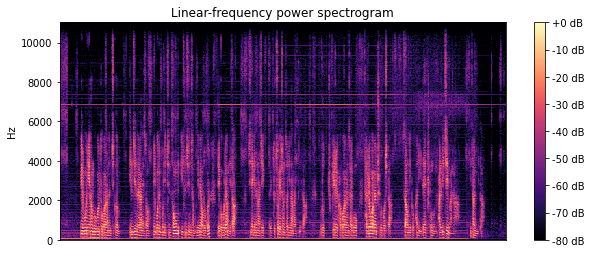

In [9]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [5]:
frame_length = 0.020
frame_stride = 0.010

# def Mel_S(wav_file):
#     # mel-spectrogram
#     y, sr = librosa.load(wav_file, sr=16000)


file_path = '/Users/hom/dev/Speech Interface/proj1_sample_32PCM.wav'
y, sr = librosa.load(file_path, 16000)
print(len(y), sr)

# wav_length = len(y)/sr
input_nfft = int(round(sr*frame_length))
input_stride = int(round(sr*frame_stride))
print(input_nfft)
print(input_stride)

S = librosa.feature.melspectrogram(y=y, n_fft=input_nfft, hop_length=input_stride)

print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))

351542 16000
320
160
Wav length: 21.971375, Mel_S shape:(128, 2198)


/Users/hom/.virtualenvs/speech_inf/lib/python3.7/site-packages/librosa/filters.py:235: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


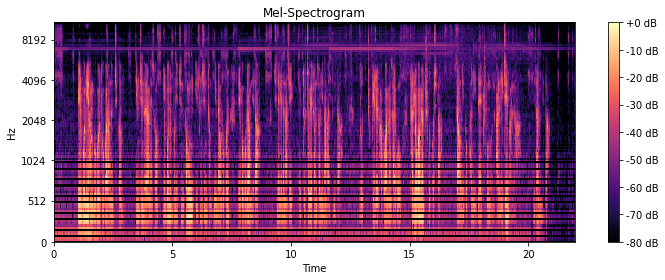

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')
plt.show()

# Documentation!

Librosa has extensive documentation with examples.

When in doubt, go to http://librosa.github.io/librosa/

# Conventions

- All data are basic `numpy` types
- **Audio buffers** are called `y`
- **Sampling rate** is called `sr`
- The last axis is time-like:
        y[1000] is the 1001st sample
        S[:, 100] is the 101st frame of S
- **Defaults** `sr=22050`, `hop_length=512`

# Roadmap for today

- `librosa.core`
- `librosa.feature`
- `librosa.display`
- `librosa.beat`
- `librosa.segment`
- `librosa.decompose`

# `librosa.core`

- Low-level audio processes
- Unit conversion
- Time-frequency representations

To load a signal at its native sampling rate, use `sr=None`

In [ ]:
y_orig, sr_orig = librosa.load(librosa.util.example_audio_file(),
                     sr=None)
print(len(y_orig), sr_orig)

Resampling is easy

In [ ]:
sr = 22050

y = librosa.resample(y_orig, sr_orig, sr)

print(len(y), sr)

But what's that in seconds?

In [ ]:
print(librosa.samples_to_time(len(y), sr))

## Spectral representations

Short-time Fourier transform underlies most analysis.

`librosa.stft` returns a complex matrix `D`.

`D[f, t]` is the FFT value at frequency `f`, time (frame) `t`.

In [ ]:
D = librosa.stft(y)
print(D.shape, D.dtype)

Often, we only care about the magnitude.

`D` contains both *magnitude* `S` and *phase* $\phi$.

$$
D_{ft} = S_{ft} \exp\left(j \phi_{ft}\right)
$$

In [ ]:
import numpy as np

In [ ]:
S, phase = librosa.magphase(D)
print(S.dtype, phase.dtype, np.allclose(D, S * phase))

## Constant-Q transforms

The CQT gives a logarithmically spaced frequency basis.

This representation is more natural for many analysis tasks.

In [ ]:
C = librosa.cqt(y, sr=sr)

print(C.shape, C.dtype)

## Exercise 0

- Load a different audio file
- Compute its STFT with a different hop length

In [ ]:
# Exercise 0 solution

y2, sr2 = librosa.load(   )

D = librosa.stft(y2, hop_length=   )

# `librosa.feature`

- Standard features:
    - `librosa.feature.melspectrogram`
    - `librosa.feature.mfcc`
    - `librosa.feature.chroma`
    - Lots more...
- Feature manipulation:
    - `librosa.feature.stack_memory`
    - `librosa.feature.delta`

Most features work either with audio or STFT input

In [ ]:
melspec = librosa.feature.melspectrogram(y=y, sr=sr)

# Melspec assumes power, not energy as input
melspec_stft = librosa.feature.melspectrogram(S=S**2, sr=sr)

print(np.allclose(melspec, melspec_stft))

# `librosa.display`

- Plotting routines for spectra and waveforms

- **Note**: major overhaul coming in 0.5

In [ ]:
# Displays are built with matplotlib 
import matplotlib.pyplot as plt

# Let's make plots pretty
import matplotlib.style as ms
ms.use('seaborn-muted')

# Render figures interactively in the notebook
%matplotlib nbagg

# IPython gives us an audio widget for playback
from IPython.display import Audio

## Waveform display

In [ ]:
plt.figure()
librosa.display.waveplot(y=y, sr=sr)

## A basic spectrogram display

In [ ]:
plt.figure()
librosa.display.specshow(melspec, y_axis='mel', x_axis='time')
plt.colorbar()

## Exercise 1

* Pick a feature extractor from the `librosa.feature` submodule and plot the output with `librosa.display.specshow`


* **Bonus**: Customize the plot using either `specshow` arguments or `pyplot` functions

In [ ]:
# Exercise 1 solution

X = librosa.feature.XX()

plt.figure()

librosa.display.specshow(    )

# `librosa.beat`

- Beat tracking and tempo estimation

The beat tracker returns the estimated tempo and beat positions (measured in frames)

In [ ]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print(tempo)
print(beats)

Let's sonify it!

In [ ]:
clicks = librosa.clicks(frames=beats, sr=sr, length=len(y))

Audio(data=y + clicks, rate=sr)

Beats can be used to downsample features

In [ ]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_sync = librosa.feature.sync(chroma, beats)

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(2, 1, 1)
librosa.display.specshow(chroma, y_axis='chroma')
plt.ylabel('Full resolution')
plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_sync, y_axis='chroma')
plt.ylabel('Beat sync')

# `librosa.segment`

- Self-similarity / recurrence
- Segmentation

Recurrence matrices encode self-similarity

    R[i, j] = similarity between frames (i, j)
    
Librosa computes recurrence between `k`-nearest neighbors.

In [ ]:
R = librosa.segment.recurrence_matrix(chroma_sync)

In [ ]:
plt.figure(figsize=(4, 4))
librosa.display.specshow(R)

We can include affinity weights for each link as well.

In [ ]:
R2 = librosa.segment.recurrence_matrix(chroma_sync,
                                       mode='affinity',
                                       sym=True)

In [ ]:
plt.figure(figsize=(5, 4))
librosa.display.specshow(R2)
plt.colorbar()

## Exercise 2

* Plot a recurrence matrix using different  features
* **Bonus**: Use a custom distance metric

In [ ]:
# Exercise 2 solution

# `librosa.decompose`

- `hpss`: Harmonic-percussive source separation
- `nn_filter`: Nearest-neighbor filtering, non-local means, Repet-SIM
- `decompose`: NMF, PCA and friends

Separating harmonics from percussives is easy

In [ ]:
D_harm, D_perc = librosa.decompose.hpss(D)

y_harm = librosa.istft(D_harm)

y_perc = librosa.istft(D_perc)

In [ ]:
Audio(data=y_harm, rate=sr)

In [ ]:
Audio(data=y_perc, rate=sr)

NMF is pretty easy also!

In [ ]:
# Fit the model
W, H = librosa.decompose.decompose(S, n_components=16, sort=True)

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1), plt.title('W')
librosa.display.specshow(librosa.logamplitude(W**2), y_axis='log')
plt.subplot(1, 2, 2), plt.title('H')
librosa.display.specshow(H, x_axis='time')

In [ ]:
# Reconstruct the signal using only the first component
S_rec = W[:, :1].dot(H[:1, :])

y_rec = librosa.istft(S_rec * phase)

In [ ]:
Audio(data=y_rec, rate=sr)

## Exercise 3

- Compute a chromagram using only the harmonic component
- **Bonus**: run the beat tracker using only the percussive component

# Wrapping up

- This was just a brief intro, but there's lots more!

- Read the docs: http://librosa.github.io/librosa/
- And the example gallery: http://librosa.github.io/librosa_gallery/
- We'll be sprinting all day.  Get involved! https://github.com/librosa/librosa/issues/395